### KNN Regression으로 50cm 생선의 무게 예측

In [64]:
import numpy as np

fish_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
fish_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

### Train , Test

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
train_input , test_input , train_target, test_target = \
    train_test_split(fish_length,fish_weight,random_state=42)

In [67]:
train_input = train_input.reshape(-1,1)

test_input = test_input.reshape(-1,1)

### KNN Regression Model

In [68]:
from sklearn.neighbors import KNeighborsClassifier

In [69]:
# 이웃의 갯수를 3으로 선택
knr = KNeighborsClassifier(n_neighbors=3)
knr.fit(train_input,train_target)


KNeighborsClassifier(n_neighbors=3)

In [70]:
# 길이가 50cm인 생선의 무게 예측
knr.predict([[50]])

array([1000.])

In [71]:
# 기존 데이터로 무게 확인
for i, v in list(enumerate(train_target)):
    if v == train_target.max():
        print(train_input[i],v)

[43.] 1100.0
[42.] 1100.0


In [72]:
# 산점도로 이웃을 구해서 확인하자.
import matplotlib.pyplot as plt

In [73]:
# 50cm 생선의 이웃을 구하자.
distance, indexes = knr.kneighbors([[50]])

train_input[indexes]
train_target[indexes]

array([[1000., 1000., 1100.]])

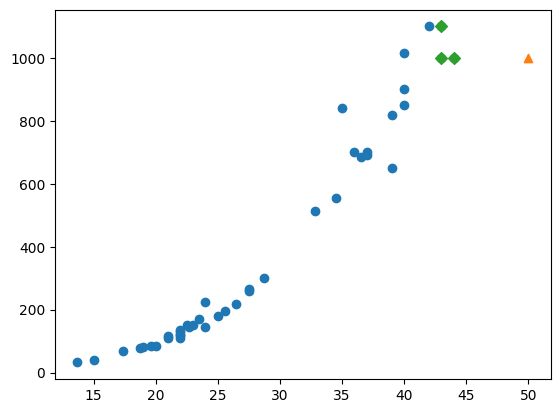

In [74]:
# 훈련세트의 산점도
plt.scatter(
    x=train_input,
    y=train_target
)

plt.scatter(
    x=50,
    y=knr.predict([[50]]),
    marker='^'
)

plt.scatter(
    x=train_input[indexes],
    y=train_target[indexes],
    marker='D'
)

In [75]:
# 이웃들의 평균값을 구해보자
np.mean(train_target[indexes])

1033.3333333333333

---
### 선형회귀(Linear Regression)
: 직선이나 곡선의 함수식(방정식)을 이용하여 구하는 방식으로 로지스틱 회귀 분석이나 인공신경망의 기초가 된다. 

In [76]:
from sklearn.linear_model import LinearRegression

In [77]:
lr = LinearRegression()
lr.fit(train_input,train_target)
lr.predict([[50]])

array([1241.83860323])

In [78]:
# Y = aX + b 에서 기울기로 절편값을 출력(Deep Learning)에서는 Weight와 Bias로 불림
print(lr.coef_,lr.intercept_)

[39.01714496] -709.0186449535474


In [79]:
# 기울기와 절편값으로 계산
39.01714496 * 50 - 709.0186449535474

1241.8386030464528

In [83]:
#함수 만들기 
def f(num):
    return 39.01714496 * num - 709.0186449535474

### 산점도 그리기

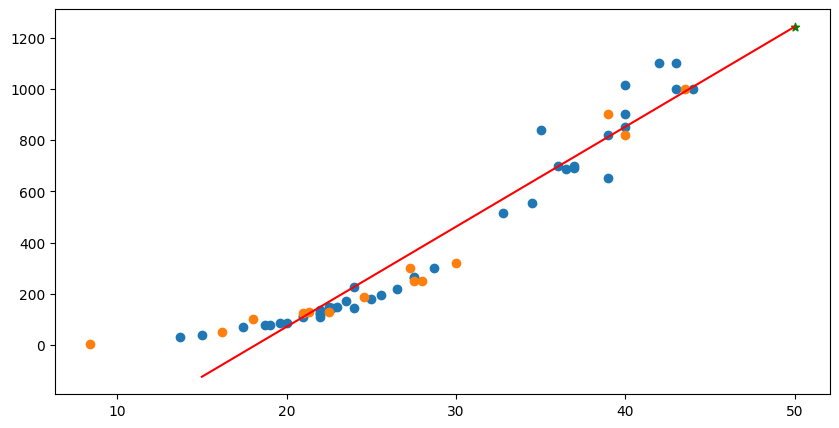

In [94]:
x = np.linspace(15,50)

# 훈련세트의 산점도
plt.figure(figsize=(10,5))
plt.scatter(
    x=train_input,
    y=train_target
)

plt.scatter(
    x=test_input,
    y=test_target
)

plt.plot(
    x,
    f(x),
    c='red'
)



# 50cm 생선
plt.scatter(
    50,
    f(50),
    marker='*',
    c='green'
)

plt.show()

### 산점도의 회귀선을 보니 길이가 작아지면 무게가 음수일 경우가 발생할 수 있다. ( 절편이 음수 )

### 과대적합과 과소적합 확인

In [93]:
print(lr.score(train_input,train_target))
print(lr.score(test_input,test_target))

0.9398463339976041
0.824750312331356


---
### 특성 공학
- 다항 회귀 : 
$ y = a*x^2 + b*x + c $ 처럼 만드는 것 <br><br> 
    - 항이 여러개 있고 Feature가 하나인 것을 의미 <br><br> 
    - feature가 여러 개인 회귀는 다중 회귀라고 한다. 

In [99]:
# Feature를 제곱한 Column을 생성하여 기존의 column에 붙인다. 
train_poly = np.column_stack((train_input,train_input**2))
test_poly = np.column_stack((test_input,test_input**2))

train_poly

array([[  19.6 ,  384.16],
       [  22.  ,  484.  ],
       [  18.7 ,  349.69],
       [  17.4 ,  302.76],
       [  36.  , 1296.  ],
       [  25.  ,  625.  ],
       [  40.  , 1600.  ],
       [  39.  , 1521.  ],
       [  43.  , 1849.  ],
       [  22.  ,  484.  ],
       [  20.  ,  400.  ],
       [  22.  ,  484.  ],
       [  24.  ,  576.  ],
       [  27.5 ,  756.25],
       [  43.  , 1849.  ],
       [  40.  , 1600.  ],
       [  24.  ,  576.  ],
       [  21.  ,  441.  ],
       [  27.5 ,  756.25],
       [  40.  , 1600.  ],
       [  32.8 , 1075.84],
       [  26.5 ,  702.25],
       [  36.5 , 1332.25],
       [  13.7 ,  187.69],
       [  22.7 ,  515.29],
       [  15.  ,  225.  ],
       [  37.  , 1369.  ],
       [  35.  , 1225.  ],
       [  28.7 ,  823.69],
       [  23.5 ,  552.25],
       [  39.  , 1521.  ],
       [  21.  ,  441.  ],
       [  23.  ,  529.  ],
       [  22.  ,  484.  ],
       [  44.  , 1936.  ],
       [  22.5 ,  506.25],
       [  19.  ,  361.  ],
 

In [100]:
lr = LinearRegression()
lr.fit(train_poly,train_target)

LinearRegression()

In [101]:
print(lr.coef_,lr.intercept_)

[-21.55792498   1.01433211] 116.05021078278423


In [114]:
def g(x):
    return 1.01433211 * x**2 -21.55792498 * x  + 116.05021078278423

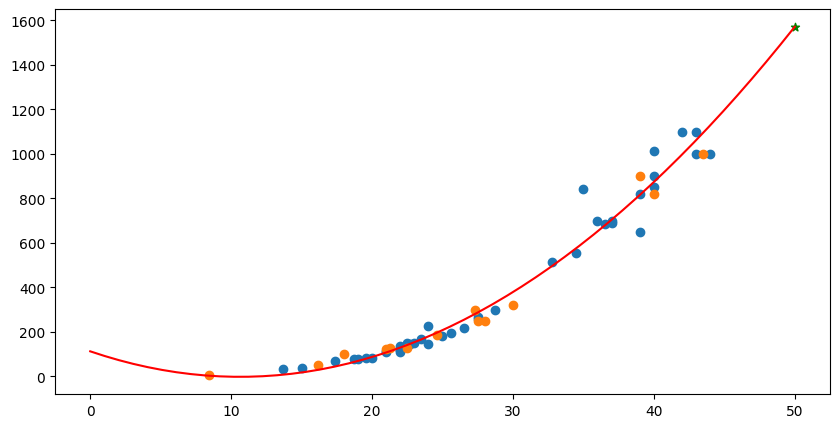

In [112]:
x = np.linspace(0,50)

# 훈련세트의 산점도
plt.figure(figsize=(10,5))
plt.scatter(
    x=train_input,
    y=train_target
)

plt.scatter(
    x=test_input,
    y=test_target
)

plt.plot(
    x,
    g(x),
    c='red'
)

# 50cm 생선
plt.scatter(
    50,
    g(50),
    marker='*',
    c='green'
)

plt.show()

In [113]:
print(lr.score(train_poly,train_target))
print(lr.score(test_poly,test_target))

0.9706807451768623
0.9775935108325123


### 약간의 과소적합이 발생하지만 단순회귀보다는 다항회귀가 진전이 있어 보인다.